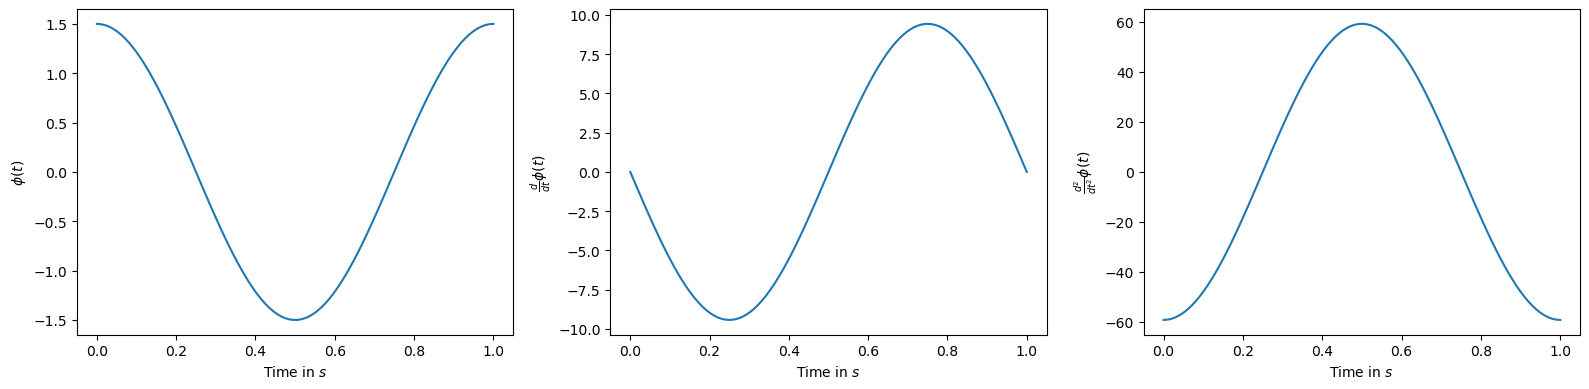

In [1]:
%run sympy_pendel_luecke.ipynb

In [2]:
import numpy as np
from scipy.io import savemat, loadmat
import pylab as pl
from scipy.signal import butter, sosfiltfilt,spectrogram, sosfreqz


In [3]:
g = 9.81 # m/s^2
l = 0.25 # m
a0 = 10.0 # degrees
T = 5.0 # s


In [4]:
om = (g/l)**0.5
f =  om/(2*np.pi)

In [5]:
print(f'Pendelum frequency is {om}, Hz')

Pendelum frequency is 6.26418390534633, Hz


In [6]:
t = np.linspace(0, T,1000)

In [7]:
# from pendulum script
phi = phit_f(a0,om,t)
phidt = phidt_f(a0,om,t)
phiddt = phiddt_f(a0,om,t)

In [8]:
err = np.random.uniform(-1,1,len(t))*0.25*a0
gest = phi + err

In [18]:
sdict ={'t': t, 'phi': phi, 'phidt': phidt, 'phiddt': phiddt, 'gest': gest }
savemat('results.mat', sdict)

In [35]:
dt = loadmat('results.mat')
print('Load data')

for k,v in dt.items():
    print(k)

Load data
__header__
__version__
__globals__
t
phi
phidt
phiddt
gest


In [36]:
t = dt['t'][0]
ori = dt['phi'][0]
sig =dt['gest'][0]

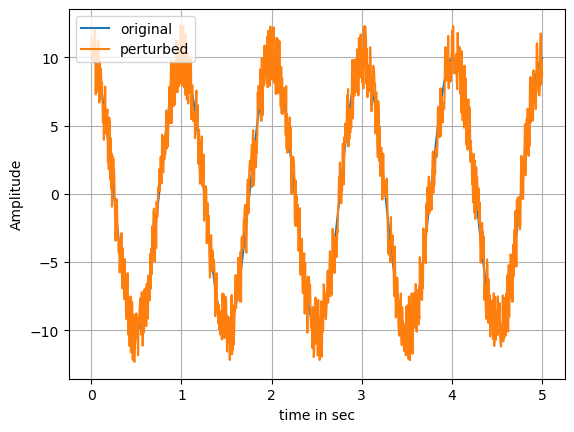

In [44]:
pl.figure()
pl.plot(t, ori, label='original')
pl.plot(t, sig, label='perturbed')
pl.xlabel('time in sec')
pl.ylabel('Amplitude')
pl.grid('--')
pl.legend(loc='upper left')

In [21]:
t

array([[0.        , 0.00500501, 0.01001001, 0.01501502, 0.02002002,
        0.02502503, 0.03003003, 0.03503504, 0.04004004, 0.04504505,
        0.05005005, 0.05505506, 0.06006006, 0.06506507, 0.07007007,
        0.07507508, 0.08008008, 0.08508509, 0.09009009, 0.0950951 ,
        0.1001001 , 0.10510511, 0.11011011, 0.11511512, 0.12012012,
        0.12512513, 0.13013013, 0.13513514, 0.14014014, 0.14514515,
        0.15015015, 0.15515516, 0.16016016, 0.16516517, 0.17017017,
        0.17517518, 0.18018018, 0.18518519, 0.19019019, 0.1951952 ,
        0.2002002 , 0.20520521, 0.21021021, 0.21521522, 0.22022022,
        0.22522523, 0.23023023, 0.23523524, 0.24024024, 0.24524525,
        0.25025025, 0.25525526, 0.26026026, 0.26526527, 0.27027027,
        0.27527528, 0.28028028, 0.28528529, 0.29029029, 0.2952953 ,
        0.3003003 , 0.30530531, 0.31031031, 0.31531532, 0.32032032,
        0.32532533, 0.33033033, 0.33533534, 0.34034034, 0.34534535,
        0.35035035, 0.35535536, 0.36036036, 0.36

In [51]:
phif = np.fft.fft(ori)
gesf = np.fft.fft(sig) #perturbed signal transform
L = len(phif) //2 +1
dt = t[1]-t[0]
fs = 1/dt
print(f'Simple interval: {dt} s')
print(f'Sampling frequence: {fs}Hz')
freq =np.linspace(0, fs/2,L)

Simple interval: 0.005005005005005005 s
Sampling frequence: 199.8Hz


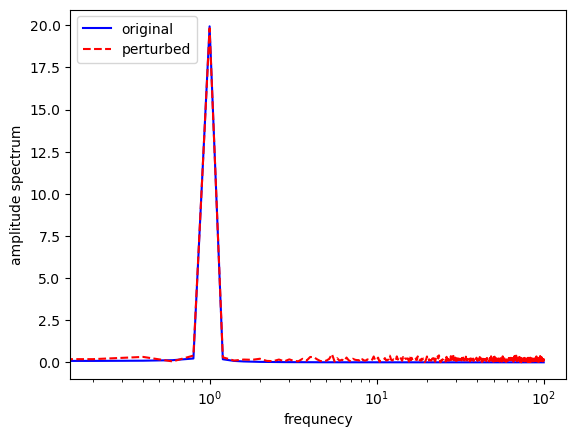

In [58]:
pl.figure()
pl.semilogx(freq, 2/L*np.abs(phif[:L]), 'b-',  label='original')
pl.semilogx(freq, 2/L*np.abs(gesf[:L]),'r--', label='perturbed')
pl.xlabel('frequnecy')
pl.ylabel('amplitude spectrum')
pl.legend(loc="upper left")

Text(0.5, 0, 'Time, s')

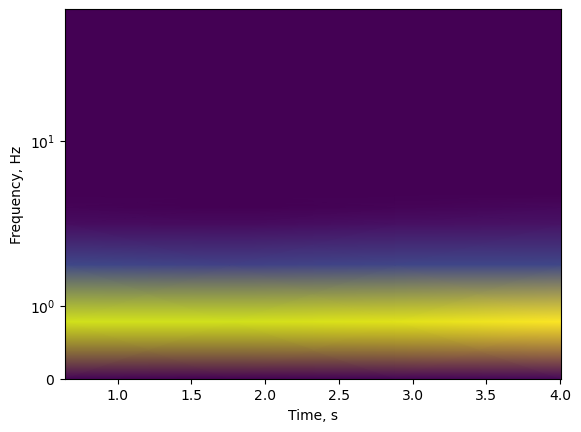

In [62]:
fss, tss, sxx = spectrogram(sig,fs)
pl.figure()
pl.pcolormesh(tss,fss,sxx, shading='gouraud')
pl.yscale('symlog')
pl.ylabel('Frequency, Hz')
pl.xlabel('Time, s')

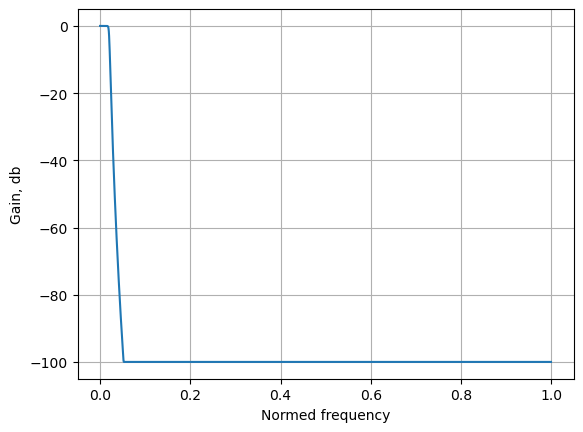

In [70]:
#sos=butter(4, 12, 'lowpass', fs=fs, output='sos')
sos=butter(12, 2, 'lowpass', fs=fs, output='sos')
w,h = sosfreqz(sos, worN=1500)
db = 20 * np.log10(np.maximum(np.abs(h), 1e-5))

pl.figure()
pl.plot(w/np.pi, db)
pl.xlabel("Normed frequency")
pl.ylabel('Gain, db')
pl.grid("-")

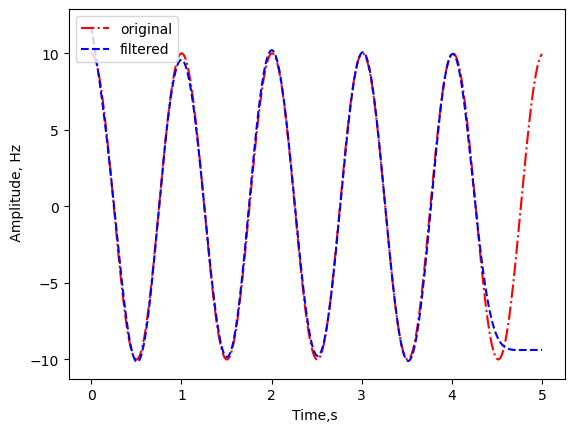

In [81]:
gef = sosfiltfilt(sos, sig)
pl.figure()
pl.plot(t, ori,'r-.',label='original')
pl.plot(t, gef,'b--', label='filtered')
pl.xlabel('Time,s ')
pl.ylabel(' Amplitude, Hz')
pl.legend(loc='upper left')